# IPL - Cricket Score Predictor

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('ipl_data.csv')   # data set upto 2017

In [3]:
df.head()

,Match ID,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5overs,wickets_last_5over,striker,non-striker,total
0,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape              #76014 rows and 15 rows

(76014, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Match ID            76014 non-null  int64  
 1   date                76014 non-null  object 
 2   venue               76014 non-null  object 
 3   bat_team            76014 non-null  object 
 4   bowl_team           76014 non-null  object 
 5   batsman             76014 non-null  object 
 6   bowler              76014 non-null  object 
 7   runs                76014 non-null  int64  
 8   wickets             76014 non-null  int64  
 9   overs               76014 non-null  float64
 10  runs_last_5overs    76014 non-null  int64  
 11  wickets_last_5over  76014 non-null  int64  
 12  striker             76014 non-null  int64  
 13  non-striker         76014 non-null  int64  
 14  total               76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+

In [6]:
df.describe()

,Match ID,runs,wickets,overs,runs_last_5overs,wickets_last_5over,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
df.columns

Index(['Match ID', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5overs',
       'wickets_last_5over', 'striker', 'non-striker', 'total'],
      dtype='object')

In [8]:
df.isnull().sum()       # NO null values!!

Match ID              0
date                  0
venue                 0
bat_team              0
bowl_team             0
batsman               0
bowler                0
runs                  0
wickets               0
overs                 0
runs_last_5overs      0
wickets_last_5over    0
striker               0
non-striker           0
total                 0
dtype: int64

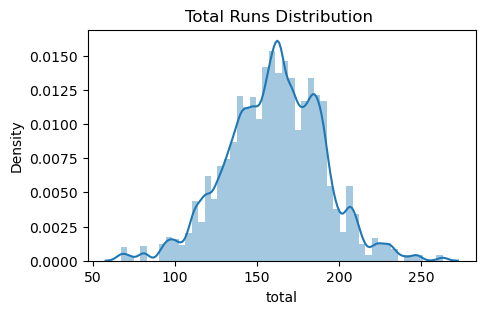

In [9]:
# Lets check the Totalruns Distribution              

plt.figure(figsize=(5,3))
sns.distplot(df['total'])
plt.title("Total Runs Distribution ")
plt.show()

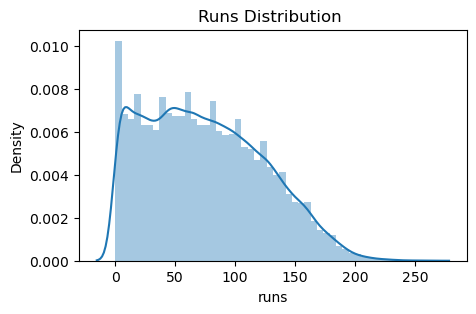

In [10]:
plt.figure(figsize=(5,3))
sns.distplot(df['runs'])
plt.title("Runs Distribution ")
plt.show()

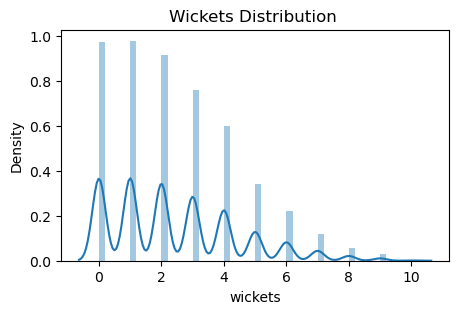

In [11]:
# Wickets Distribution

plt.figure(figsize=(5,3))
sns.distplot(df['wickets'])
plt.title("Wickets Distribution ")
plt.show()

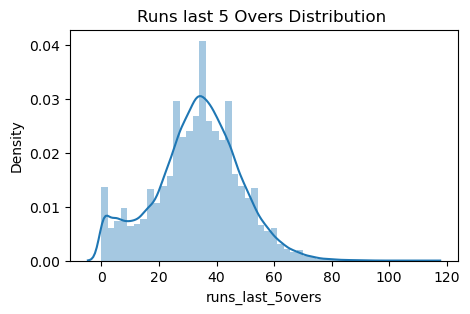

In [12]:
# Last5 overs runs Distribution

plt.figure(figsize=(5,3))
sns.distplot(df['runs_last_5overs'])
plt.title("Runs last 5 Overs Distribution ")
plt.show()

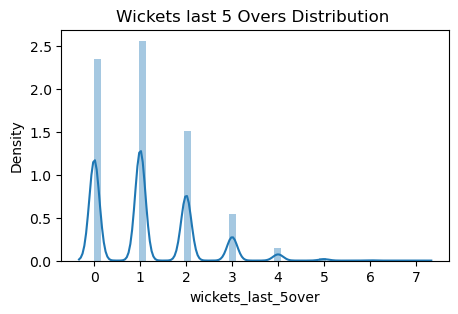

In [13]:
# Wickets overs runs Distribution

plt.figure(figsize=(5,3))
sns.distplot(df['wickets_last_5over'])
plt.title("Wickets last 5 Overs Distribution ")
plt.show()

- Lets drop the unwanted columns which doesn't have much impact on the Target.

In [14]:
df.columns

Index(['Match ID', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5overs',
       'wickets_last_5over', 'striker', 'non-striker', 'total'],
      dtype='object')

In [15]:
df.drop('Match ID',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)
df.drop('venue',axis=1,inplace=True)
df.drop('batsman',axis=1,inplace=True)
df.drop('bowler',axis=1,inplace=True)
df.drop('striker',axis=1,inplace=True)
df.drop('non-striker',axis=1,inplace=True)

In [16]:
df.shape     # after removing unwanted columns now we have 8 columns.

(76014, 8)

In [17]:
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [18]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

- in the bat_team column Rising Pune Supergiants and Rising Pune Supergiant is the same team. lets replace it and make it one.

In [19]:
df['bat_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

-We Will consider only playing teams as on 2023 IPL. 
- we will drop teams like [Rising Pune Supergiants,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors, Gujarat Lions
- We'll drop Gujarat lions it joined the IPL on 2016 and out Dataset is available only till 2017, Lack of Data about GJ L.
- we will make a new variable and store the current playing teams

In [20]:
Playing_Teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [21]:
df = df[(df['bat_team'].isin(Playing_Teams)) & (df['bowl_team'].isin(Playing_Teams))]

In [22]:
df.shape     # After keeping only playing teams data, now we have 53811 rows and 8 columns

(53811, 8)

In [23]:
df

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...
75884,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


- We will try to predict the 20 Overs score of the Batting Team.
- We cannot predict the score at the start of the match, hence we will erase first 5 Overs records of every match.

In [24]:
df = df[df['overs'] >= 5.0]
df

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...
75884,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [25]:
df.shape    # after removing first 5 overs of every match,now we have 40108 rows.

(40108, 8)

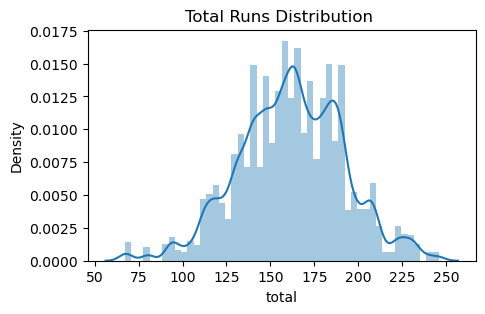

In [26]:
# Lets check the Totalruns Distribution as we have removed unwanted data.           

plt.figure(figsize=(5,3))
sns.distplot(df['total'])
plt.title("Total Runs Distribution ")
plt.show()

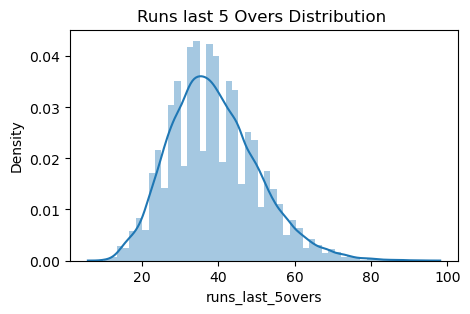

In [27]:
# Last5 overs runs Distribution

plt.figure(figsize=(5,3))
sns.distplot(df['runs_last_5overs'])
plt.title("Runs last 5 Overs Distribution ")
plt.show()

In [28]:
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [29]:
# lest encode the categorical data

le = LabelEncoder()
for i in ['bat_team','bowl_team']:
    df[i] = le.fit_transform(df[i])
df.head()
                            

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [30]:
print("Encoded Teams:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Encoded Teams:
{'Chennai Super Kings': 0, 'Delhi Daredevils': 1, 'Kings XI Punjab': 2, 'Kolkata Knight Riders': 3, 'Mumbai Indians': 4, 'Rajasthan Royals': 5, 'Royal Challengers Bangalore': 6, 'Sunrisers Hyderabad': 7}


In [31]:
# lets segregate data into x and y

x = df.drop('total',axis=1)    # features
y = df['total']            # Target 

In [32]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (40108, 7)
Shape of y: (40108,)


In [33]:
x

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over
32,3,6,61,0,5.1,59,0
33,3,6,61,1,5.2,59,1
34,3,6,61,1,5.3,59,1
35,3,6,61,1,5.4,59,1
36,3,6,61,1,5.5,58,1
...,...,...,...,...,...,...,...
75884,3,4,106,9,18.1,29,4
75885,3,4,107,9,18.2,29,4
75886,3,4,107,9,18.3,28,4
75887,3,4,107,9,18.4,24,4


# Scaling

In [34]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [35]:
x

array([[-0.14626422,  1.29985174, -0.82928351, ..., -1.66864359,
         1.74832059, -1.23657225],
       [-0.14626422,  1.29985174, -0.82928351, ..., -1.64551123,
         1.74832059, -0.29551691],
       [-0.14626422,  1.29985174, -0.82928351, ..., -1.62237886,
         1.74832059, -0.29551691],
       ...,
       [-0.14626422,  0.35101237,  0.29358994, ...,  1.3848286 ,
        -0.94647237,  2.52764913],
       [-0.14626422,  0.35101237,  0.29358994, ...,  1.40796097,
        -1.29418759,  2.52764913],
       [-0.14626422,  0.35101237,  0.29358994, ...,  1.43109333,
        -1.38111639,  3.46870447]])

In [36]:
# Train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
print("Shape of xtrain ", xtrain.shape)         # training data.
print("Shape of ytrain ", ytrain.shape)

Shape of xtrain  (32086, 7)
Shape of ytrain  (32086,)


# Model Building

In [38]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

dtc = DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)

rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)

knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)

xg = XGBRegressor()
xg.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
ypred1 = lr.predict(xtest)

ypred2 = dtc.predict(xtest)

ypred3 = rf.predict(xtest)

ypred4 = gb.predict(xtest)

ypred5 = knn.predict(xtest)

ypred6 = xg.predict(xtest)

In [40]:
# lets see the resut in data frame

model_train = pd.DataFrame({'Actual': ytest,
                           'Linear Reg': ypred1,
                           'Decision Tree': ypred2,
                           'Random Forest': ypred3,
                           'Gradient Boost': ypred4,
                           'KNN': ypred5,
                           'XGBoost': ypred6})

In [41]:
model_train

,Actual,Linear Reg,Decision Tree,Random Forest,Gradient Boost,KNN,XGBoost
893,208,167.925122,208.0,200.81,163.799540,202.4,181.025391
53832,195,176.122327,195.0,188.55,177.528656,178.6,183.919022
55895,184,167.143791,152.0,166.55,172.918543,158.4,174.055847
20188,132,133.459191,132.0,133.37,127.768870,132.0,132.024216
16949,163,140.835995,163.0,162.76,151.314193,163.0,161.619492
...,...,...,...,...,...,...,...
61130,130,128.485609,130.0,129.86,119.530621,130.0,123.149849
48668,166,154.529805,166.0,157.04,157.753250,162.4,152.307983
25718,159,166.628704,165.0,162.69,166.444404,159.0,162.320465
54581,115,135.404381,115.0,117.50,126.312148,118.2,129.355774


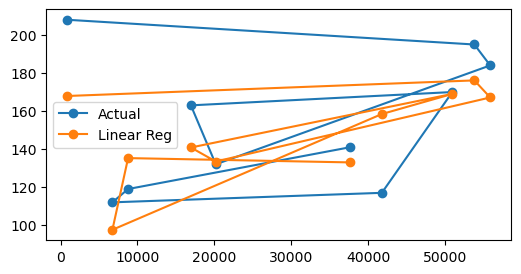

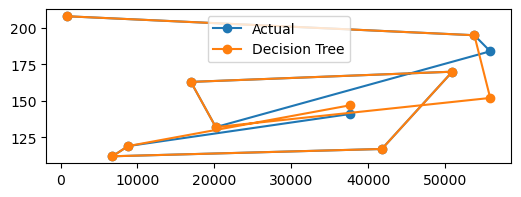

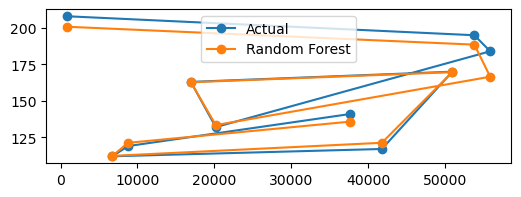

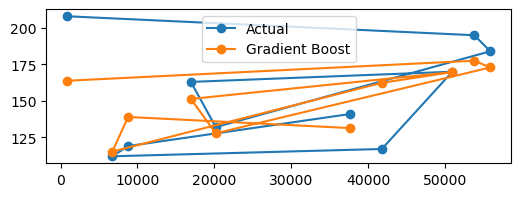

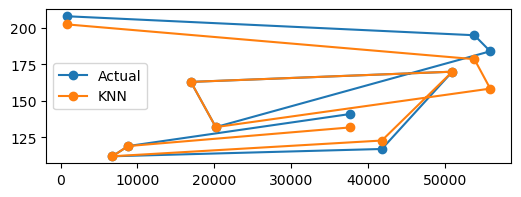

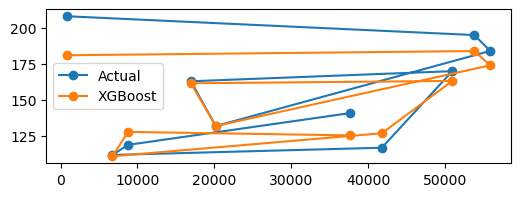

In [42]:
# lets check the prediction visually 

plt.figure(figsize=(6,3))
plt.plot(model_train['Actual'].iloc[:10], label = 'Actual',marker='o')
plt.plot(model_train['Linear Reg'].iloc[:10],label='Linear Reg', marker='o')
plt.legend()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(model_train['Actual'].iloc[:10], label = 'Actual',marker='o')
plt.plot(model_train['Decision Tree'].iloc[:10],label='Decision Tree',marker='o')
plt.legend()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(model_train['Actual'].iloc[:10], label = 'Actual',marker='o')
plt.plot(model_train['Random Forest'].iloc[:10],label='Random Forest',marker='o')
plt.legend()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(model_train['Actual'].iloc[:10], label = 'Actual',marker='o')
plt.plot(model_train['Gradient Boost'].iloc[:10],label='Gradient Boost',marker='o')
plt.legend()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(model_train['Actual'].iloc[:10], label = 'Actual',marker='o')
plt.plot(model_train['KNN'].iloc[:10],label='KNN',marker='o')
plt.legend()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(model_train['Actual'].iloc[:10], label = 'Actual',marker='o')
plt.plot(model_train['XGBoost'].iloc[:10],label='XGBoost',marker='o')
plt.legend()
plt.show()

In [43]:
# lets check the r2_score of the models.

score1 = metrics.r2_score(ytest,ypred1)
score2 = metrics.r2_score(ytest,ypred2)
score3 = metrics.r2_score(ytest,ypred3)
score4 = metrics.r2_score(ytest,ypred4)
score5 = metrics.r2_score(ytest,ypred5)
score6 = metrics.r2_score(ytest,ypred6)

print("Linear Reg r2_score:", score1)
print("Decision Tree r2_score:", score2)
print("Random Forest r2_score:", score3)
print("Gradient Boost r2_score:", score4)
print("KNN r2_score:", score5)
print("XGBoost r2_score:", score6)

Linear Reg r2_score: 0.658520592382071
Decision Tree r2_score: 0.8548518644326715
Random Forest r2_score: 0.9278741204790877
Gradient Boost r2_score: 0.6912323440485824
KNN r2_score: 0.9268488275958466
XGBoost r2_score: 0.8434557438494936


- Highest Accuracy = 92.71% with Random Forest Model followed by KNN

In [44]:
# Let check MAE - The lowest MAW score means our model is performing good

s1 = metrics.mean_absolute_error(ytest,ypred1)
s4 = metrics.mean_absolute_error(ytest,ypred2)
s5 = metrics.mean_absolute_error(ytest,ypred3)
s6 = metrics.mean_absolute_error(ytest,ypred4)
s7 = metrics.mean_absolute_error(ytest,ypred5)
s8 = metrics.mean_absolute_error(ytest,ypred6)

print("Linear Reg MAE:", s1)
print("Decision Tree MAE:", s4)
print("Random Forest MAE:", s5)
print("Gradient Boost MAE:", s6)
print("KNN MAE:", s7)
print("XGBoost MAE:", s8)

Linear Reg MAE: 12.999855786432652
Decision Tree MAE: 4.210732984293194
Random Forest MAE: 4.8059834858899935
Gradient Boost MAE: 12.422794103481136
KNN MAE: 3.4395661929693344
XGBoost MAE: 8.521361202885759


In [45]:
# MSE - Mean Squared Error 

m1 = metrics.mean_absolute_error(ytest,ypred1)
m2 = metrics.mean_absolute_error(ytest,ypred2)
m3 = metrics.mean_absolute_error(ytest,ypred3)
m4 = metrics.mean_absolute_error(ytest,ypred4)
m5 = metrics.mean_absolute_error(ytest,ypred5)
m6 = metrics.mean_absolute_error(ytest,ypred6)

print("Linear Reg MSE:", m1)
print("Decision Tree MSE:", m2)
print("Random Forest MSE:", m3)
print("Gradient Boost MSE:",m4)
print("KNN MSE:", m5)
print("XGBoost MSE:", m6)

Linear Reg MSE: 12.999855786432652
Decision Tree MSE: 4.210732984293194
Random Forest MSE: 4.8059834858899935
Gradient Boost MSE: 12.422794103481136
KNN MSE: 3.4395661929693344
XGBoost MSE: 8.521361202885759


In [46]:
# RMSE

rm1 = np.sqrt(m1)
rm2 = np.sqrt(m2)
rm3 = np.sqrt(m3)
rm4 = np.sqrt(m4)
rm5 = np.sqrt(m5)
rm6 = np.sqrt(m6)

print("RMSE - Linear Reg", rm1)
print("RMSE - Decision Tree", rm2)
print("RMSE - Random Forest", rm3)
print("RMSE - Gradient Boost", rm4)
print("RMSE - KNN ", rm5)
print("RMSE - XG Boost", rm6)

RMSE - Linear Reg 3.605531276584999
RMSE - Decision Tree 2.052007062437455
RMSE - Random Forest 2.192255342310743
RMSE - Gradient Boost 3.5245984315211194
RMSE - KNN  1.8546067488740934
RMSE - XG Boost 2.919137064765161


- The lowest MSE = Randomforest
- Hihest Accuracy = Randomforest, we will check the final the Random Forest for deployment.

In [58]:
# lets check the training and Testing Accuracy of the RandomForest Model

rf2 = RandomForestRegressor()
rf2.fit(xtrain,ytrain)
pred = rf2.predict(xtest)

# performance 
mae=mean_absolute_error(ytest,pred)
mse=mean_squared_error(ytest,pred)
r2=r2_score(ytest,pred)
rmse=np.sqrt(mse)

print(f"MAE{mae} \nMSE:{mse} \nRMSE:{rmse}\nACCURACY_SCORE:{r2}")

train = rf2.score(xtrain,ytrain)
test = rf2.score(xtest,ytest)
print(f"Training Score:{train}\nTesting Score:{test}")

MAE4.81500713514027 
MSE:64.90541419615968 
RMSE:8.05638965021924
ACCURACY_SCORE:0.9273866240377449
Training Score:0.989294567608012
Testing Score:0.9273866240377449


# Traning score = 98.93%
# Testing Score = 92.73%

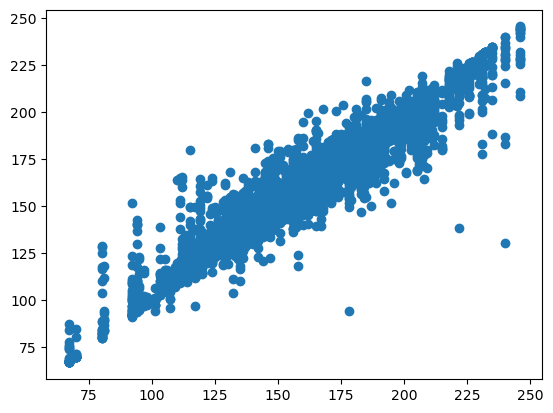

In [47]:
# lets check the Antual and predicted data

plt.scatter(ytest, ypred3)  
plt.show()

- here we can see that the actual and the predicted score are still makes a diagional line which means our RandomForest model is making good predictions.

In [48]:
df.sample(2)

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over,total
53871,3,6,171,3,17.5,60,0,195
14314,5,1,112,5,16.4,39,1,141


In [49]:
# we will create a small data in python dictionary

data = {'bat_team':6,
       'bowl_team':7,
       'runs':48,
       'wickets':1,
       'overs':5.4,
       'runs_last_5overs':43,
       'wickets_last_5over':1}

ab = pd.DataFrame(data,index=[0])
ab

,bat_team,bowl_team,runs,wickets,overs,runs_last_5overs,wickets_last_5over
0,6,7,48,1,5.4,43,1


In [50]:
# now we will predict the Score for above sample Seanario
# for prediction we will use out best Model i.e. Random Forest 

In [51]:
new = rf.predict(ab)
print(new.round(0))

[239.]


In [59]:
# Lets save the model using Pickle 

In [60]:
import pickle 
filename = "ipl_score.pkl"
pickle.dump(rf,open(filename, 'wb'))